# Deep Learning with PyTorch


Author: [Anand Saha](http://teleported.in/)

### 2. Building a simple neural network

In [8]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

from torch.autograd import Variable

# Custom DataSet
from data import iris

### The Dataset and the challenge

![iris](data/iris.jpg)

The **Iris** flower, image source: [Wikimedia](https://en.wikipedia.org/wiki/Iris_(plant))


| sepal_length_cm | sepal_width_cm | petal_length_cm | petal_width_cm | class           |
|-----------------|----------------|-----------------|----------------|-----------------|
| 5.1             | 3.5            | 1.4             | 0.2            | Iris-setosa     |
| 7.0             | 3.2            | 4.7             | 1.4            | Iris-versicolor |
| 6.3             | 3.3            | 6.0             | 2.5            | Iris-virginica  |


* Total instances: 150 (we have separated 20% into validation set, rest into training set)
* Download: [Data Source](https://archive.ics.uci.edu/ml/datasets/iris)

### Let's do a head on the raw file

In [9]:
!head data/iris.data.txt

sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
5.1,3.5,1.4,0.2,Iris-setosa
4.9,3.0,1.4,0.2,Iris-setosa
4.7,3.2,1.3,0.2,Iris-setosa
4.6,3.1,1.5,0.2,Iris-setosa
5.0,3.6,1.4,0.2,Iris-setosa
5.4,3.9,1.7,0.4,Iris-setosa
4.6,3.4,1.4,0.3,Iris-setosa
5.0,3.4,1.5,0.2,Iris-setosa
4.4,2.9,1.4,0.2,Iris-setosa


### Create the Fully Connected Feed Forward Neural Network

**Create the module**

In [10]:
class IrisNet(nn.Module):
    
    def __init__(self, input_size, hidden1_size, hidden2_size, num_classes):
        
        super(IrisNet, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden1_size)
        self.relu1 = nn.ReLU()
        self.fc2 = nn.Linear(hidden1_size, hidden2_size)
        self.relu2 = nn.ReLU()
        self.fc3 = nn.Linear(hidden2_size, num_classes)  
    
    def forward(self, x):
        out = self.fc1(x)
        out = self.relu1(out)
        out = self.fc2(out)
        out = self.relu2(out)
        out = self.fc3(out)
        return out

**Print the module**

In [11]:
model = IrisNet(4, 100, 50, 3)
print(model)

IrisNet(
  (fc1): Linear(in_features=4, out_features=100, bias=True)
  (relu1): ReLU()
  (fc2): Linear(in_features=100, out_features=50, bias=True)
  (relu2): ReLU()
  (fc3): Linear(in_features=50, out_features=3, bias=True)
)


### Create the DataLoader

In [12]:
batch_size = 60
iris_data_file = 'data/iris.data.txt'

In [13]:
# Get the datasets
train_ds, test_ds = iris.get_datasets(iris_data_file)

# How many instances have we got?
print('# instances in training set: ', len(train_ds))
print('# instances in testing/validation set: ', len(test_ds))

# Create the dataloaders - for training and validation/testing
# We will be using the term validation and testing data interchangably
train_loader = torch.utils.data.DataLoader(dataset=train_ds, batch_size=batch_size, shuffle=True)
test_loader  = torch.utils.data.DataLoader(dataset=test_ds, batch_size=batch_size, shuffle=True)

# instances in training set:  120
# instances in testing/validation set:  30


### Instantiate the network, the loss function and the optimizer

In [14]:
# Our model
net = IrisNet(4, 100, 50, 3)

# Out loss function
criterion = nn.CrossEntropyLoss()

# Our optimizer
learning_rate = 0.001
optimizer = torch.optim.SGD(net.parameters(), lr=learning_rate, nesterov=True, momentum=0.9, dampening=0)  

### Train it!

In [15]:
num_epochs = 500

train_loss = []
test_loss = []
train_accuracy = []
test_accuracy = []

for epoch in range(num_epochs):
    
    train_correct = 0
    train_total = 0
    
    for i, (items, classes) in enumerate(train_loader):
        
        # Convert torch tensor to Variable
        items = Variable(items)
        classes = Variable(classes)
        
        net.train()           # Put the network into training mode
        
        optimizer.zero_grad() # Clear off the gradients from any past operation
        outputs = net(items)  # Do the forward pass
        loss = criterion(outputs, classes) # Calculate the loss
        loss.backward()       # Calculate the gradients with help of back propagation
        optimizer.step()      # Ask the optimizer to adjust the parameters based on the gradients
        
        # Record the correct predictions for training data
        train_total += classes.size(0)    
        _, predicted = torch.max(outputs.data, 1)
        train_correct += (predicted == classes.data).sum()

        print ('Epoch %d/%d, Iteration %d/%d, Loss: %.4f' 
               %(epoch+1, num_epochs, i+1, len(train_ds)//batch_size, loss.data[0]))

    net.eval()                 # Put the network into evaluation mode
    
    # Book keeping
    # Record the loss
    train_loss.append(loss.data[0])

    # What was our train accuracy?
    train_accuracy.append((100 * train_correct / train_total))
    
    # How did we do on the test set (the unseen set)
    # Record the correct predictions for test data
    test_items = torch.FloatTensor(test_ds.data.values[:, 0:4])
    test_classes = torch.LongTensor(test_ds.data.values[:, 4])

    outputs = net(Variable(test_items))
    loss = criterion(outputs, Variable(test_classes))
    test_loss.append(loss.data[0])
    _, predicted = torch.max(outputs.data, 1)
    total = test_classes.size(0)
    correct = (predicted == test_classes).sum()
    test_accuracy.append((100 * correct / total))

/Users/riza/Developers/ThrowAway/pytorch-playground/lib/python3.6/site-packages/ipykernel_launcher.py:33: UserWarning: invalid index of a 0-dim tensor. This will be an error in PyTorch 0.5. Use tensor.item() to convert a 0-dim tensor to a Python number
/Users/riza/Developers/ThrowAway/pytorch-playground/lib/python3.6/site-packages/ipykernel_launcher.py:39: UserWarning: invalid index of a 0-dim tensor. This will be an error in PyTorch 0.5. Use tensor.item() to convert a 0-dim tensor to a Python number
/Users/riza/Developers/ThrowAway/pytorch-playground/lib/python3.6/site-packages/ipykernel_launcher.py:51: UserWarning: invalid index of a 0-dim tensor. This will be an error in PyTorch 0.5. Use tensor.item() to convert a 0-dim tensor to a Python number


Epoch 1/500, Iteration 1/2, Loss: 1.1438
Epoch 1/500, Iteration 2/2, Loss: 1.2093
Epoch 2/500, Iteration 1/2, Loss: 1.1940
Epoch 2/500, Iteration 2/2, Loss: 1.1189
Epoch 3/500, Iteration 1/2, Loss: 1.1345
Epoch 3/500, Iteration 2/2, Loss: 1.1245
Epoch 4/500, Iteration 1/2, Loss: 1.1071
Epoch 4/500, Iteration 2/2, Loss: 1.1054
Epoch 5/500, Iteration 1/2, Loss: 1.0571
Epoch 5/500, Iteration 2/2, Loss: 1.1120
Epoch 6/500, Iteration 1/2, Loss: 1.0536
Epoch 6/500, Iteration 2/2, Loss: 1.0827
Epoch 7/500, Iteration 1/2, Loss: 1.0652
Epoch 7/500, Iteration 2/2, Loss: 1.0463
Epoch 8/500, Iteration 1/2, Loss: 1.0326
Epoch 8/500, Iteration 2/2, Loss: 1.0501
Epoch 9/500, Iteration 1/2, Loss: 1.0420
Epoch 9/500, Iteration 2/2, Loss: 1.0172
Epoch 10/500, Iteration 1/2, Loss: 1.0210
Epoch 10/500, Iteration 2/2, Loss: 1.0178
Epoch 11/500, Iteration 1/2, Loss: 1.0136
Epoch 11/500, Iteration 2/2, Loss: 1.0085
Epoch 12/500, Iteration 1/2, Loss: 1.0078
Epoch 12/500, Iteration 2/2, Loss: 0.9982
Epoch 13/5

Epoch 100/500, Iteration 2/2, Loss: 0.4467
Epoch 101/500, Iteration 1/2, Loss: 0.4258
Epoch 101/500, Iteration 2/2, Loss: 0.4205
Epoch 102/500, Iteration 1/2, Loss: 0.4218
Epoch 102/500, Iteration 2/2, Loss: 0.4194
Epoch 103/500, Iteration 1/2, Loss: 0.4210
Epoch 103/500, Iteration 2/2, Loss: 0.4157
Epoch 104/500, Iteration 1/2, Loss: 0.4324
Epoch 104/500, Iteration 2/2, Loss: 0.3995
Epoch 105/500, Iteration 1/2, Loss: 0.4082
Epoch 105/500, Iteration 2/2, Loss: 0.4206
Epoch 106/500, Iteration 1/2, Loss: 0.4350
Epoch 106/500, Iteration 2/2, Loss: 0.3873
Epoch 107/500, Iteration 1/2, Loss: 0.3537
Epoch 107/500, Iteration 2/2, Loss: 0.4649
Epoch 108/500, Iteration 1/2, Loss: 0.3767
Epoch 108/500, Iteration 2/2, Loss: 0.4368
Epoch 109/500, Iteration 1/2, Loss: 0.3918
Epoch 109/500, Iteration 2/2, Loss: 0.4171
Epoch 110/500, Iteration 1/2, Loss: 0.4037
Epoch 110/500, Iteration 2/2, Loss: 0.4006
Epoch 111/500, Iteration 1/2, Loss: 0.4125
Epoch 111/500, Iteration 2/2, Loss: 0.3873
Epoch 112/5

Epoch 204/500, Iteration 1/2, Loss: 0.2440
Epoch 204/500, Iteration 2/2, Loss: 0.2377
Epoch 205/500, Iteration 1/2, Loss: 0.2312
Epoch 205/500, Iteration 2/2, Loss: 0.2477
Epoch 206/500, Iteration 1/2, Loss: 0.2535
Epoch 206/500, Iteration 2/2, Loss: 0.2229
Epoch 207/500, Iteration 1/2, Loss: 0.2580
Epoch 207/500, Iteration 2/2, Loss: 0.2160
Epoch 208/500, Iteration 1/2, Loss: 0.2546
Epoch 208/500, Iteration 2/2, Loss: 0.2173
Epoch 209/500, Iteration 1/2, Loss: 0.2315
Epoch 209/500, Iteration 2/2, Loss: 0.2386
Epoch 210/500, Iteration 1/2, Loss: 0.2363
Epoch 210/500, Iteration 2/2, Loss: 0.2310
Epoch 211/500, Iteration 1/2, Loss: 0.2358
Epoch 211/500, Iteration 2/2, Loss: 0.2284
Epoch 212/500, Iteration 1/2, Loss: 0.2498
Epoch 212/500, Iteration 2/2, Loss: 0.2120
Epoch 213/500, Iteration 1/2, Loss: 0.2029
Epoch 213/500, Iteration 2/2, Loss: 0.2563
Epoch 214/500, Iteration 1/2, Loss: 0.2829
Epoch 214/500, Iteration 2/2, Loss: 0.1743
Epoch 215/500, Iteration 1/2, Loss: 0.2543
Epoch 215/5

Epoch 309/500, Iteration 2/2, Loss: 0.1299
Epoch 310/500, Iteration 1/2, Loss: 0.1439
Epoch 310/500, Iteration 2/2, Loss: 0.1560
Epoch 311/500, Iteration 1/2, Loss: 0.1646
Epoch 311/500, Iteration 2/2, Loss: 0.1341
Epoch 312/500, Iteration 1/2, Loss: 0.1644
Epoch 312/500, Iteration 2/2, Loss: 0.1332
Epoch 313/500, Iteration 1/2, Loss: 0.1299
Epoch 313/500, Iteration 2/2, Loss: 0.1668
Epoch 314/500, Iteration 1/2, Loss: 0.1435
Epoch 314/500, Iteration 2/2, Loss: 0.1545
Epoch 315/500, Iteration 1/2, Loss: 0.1635
Epoch 315/500, Iteration 2/2, Loss: 0.1319
Epoch 316/500, Iteration 1/2, Loss: 0.1534
Epoch 316/500, Iteration 2/2, Loss: 0.1400
Epoch 317/500, Iteration 1/2, Loss: 0.1437
Epoch 317/500, Iteration 2/2, Loss: 0.1507
Epoch 318/500, Iteration 1/2, Loss: 0.1393
Epoch 318/500, Iteration 2/2, Loss: 0.1529
Epoch 319/500, Iteration 1/2, Loss: 0.1387
Epoch 319/500, Iteration 2/2, Loss: 0.1518
Epoch 320/500, Iteration 1/2, Loss: 0.1343
Epoch 320/500, Iteration 2/2, Loss: 0.1552
Epoch 321/5

Epoch 406/500, Iteration 1/2, Loss: 0.1515
Epoch 406/500, Iteration 2/2, Loss: 0.0775
Epoch 407/500, Iteration 1/2, Loss: 0.1230
Epoch 407/500, Iteration 2/2, Loss: 0.1059
Epoch 408/500, Iteration 1/2, Loss: 0.1315
Epoch 408/500, Iteration 2/2, Loss: 0.0972
Epoch 409/500, Iteration 1/2, Loss: 0.0845
Epoch 409/500, Iteration 2/2, Loss: 0.1430
Epoch 410/500, Iteration 1/2, Loss: 0.1167
Epoch 410/500, Iteration 2/2, Loss: 0.1120
Epoch 411/500, Iteration 1/2, Loss: 0.1097
Epoch 411/500, Iteration 2/2, Loss: 0.1168
Epoch 412/500, Iteration 1/2, Loss: 0.0785
Epoch 412/500, Iteration 2/2, Loss: 0.1480
Epoch 413/500, Iteration 1/2, Loss: 0.1262
Epoch 413/500, Iteration 2/2, Loss: 0.0998
Epoch 414/500, Iteration 1/2, Loss: 0.1552
Epoch 414/500, Iteration 2/2, Loss: 0.0702
Epoch 415/500, Iteration 1/2, Loss: 0.0944
Epoch 415/500, Iteration 2/2, Loss: 0.1312
Epoch 416/500, Iteration 1/2, Loss: 0.1207
Epoch 416/500, Iteration 2/2, Loss: 0.1037
Epoch 417/500, Iteration 1/2, Loss: 0.0643
Epoch 417/5

Plot loss vs iterations

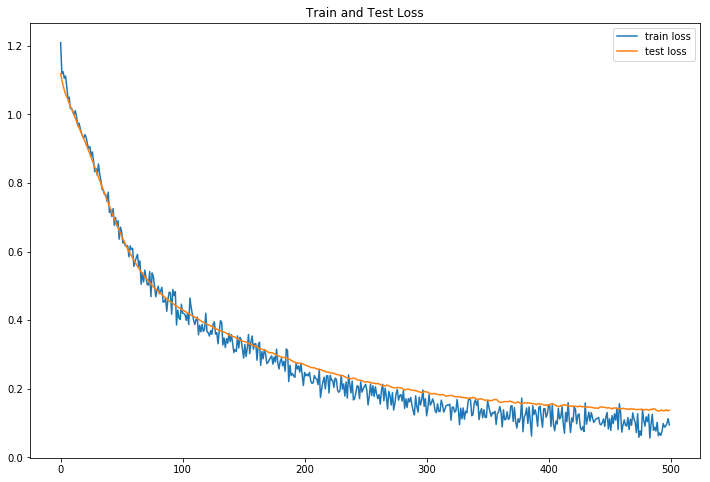

In [16]:
fig = plt.figure(figsize=(12, 8))
plt.plot(train_loss, label='train loss')
plt.plot(test_loss, label='test loss')
plt.title("Train and Test Loss")
plt.legend()
plt.show()

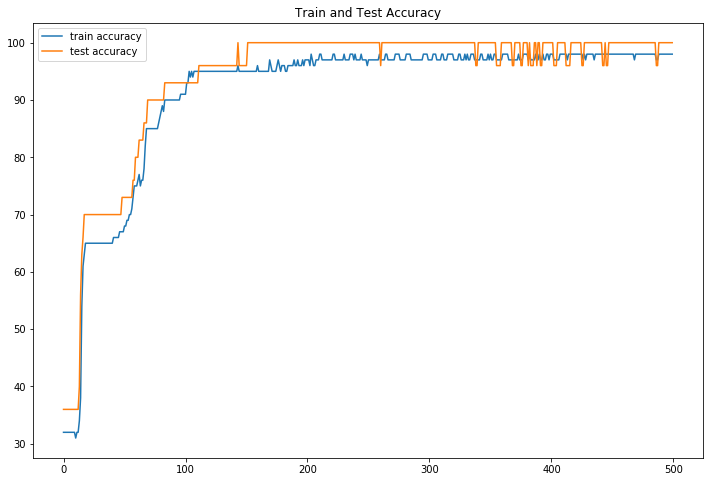

In [17]:
fig = plt.figure(figsize=(12, 8))
plt.plot(train_accuracy, label='train accuracy')
plt.plot(test_accuracy, label='test accuracy')
plt.title("Train and Test Accuracy")
plt.legend()
plt.show()

### Savign the model to disk, and loading it back

In [18]:
torch.save(net.state_dict(), "./2.model.pth")

In [19]:
net2 = IrisNet(4, 100, 50, 3)
net2.load_state_dict(torch.load("./2.model.pth"))

In [20]:
output = net2(Variable(torch.FloatTensor([[5.1, 3.5, 1.4, 0.2]])))

In [21]:
_, predicted_class = torch.max(output.data, 1)
print('Predicted class: ', predicted_class.numpy()[0])
print('Expected class: ', 0 )

Predicted class:  0
Expected class:  0
